In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install flair==0.12.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.1/373.1 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.5/788.5 kB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 22.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 67.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 89.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.

In [3]:
!pip install transformers==4.30.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 61.6 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.0
    Uninstalling tokenizers-0.15.0:
      Successfully uninstalled tokenizers-0.15.0
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2


In [4]:
from flair.data import Corpus
from flair.datasets import ColumnCorpus
from flair.embeddings import TokenEmbeddings, WordEmbeddings, StackedEmbeddings, FlairEmbeddings, FastTextEmbeddings
from typing import List

In [5]:
# French corpus of 32 texts from ECHR (automatic and official translations) with projected (reviewed) annotations

columns = {0:'text', 1:'ner'}

corpus_folder = '/content/drive/MyDrive/.../'
corpus : Corpus = ColumnCorpus(corpus_folder, columns,
                                    train_file='FR-rev-train.tsv', column_delimiter=' ',
                                    dev_file='FR-rev-dev.tsv',
                                    test_file='FR-rev-test.tsv'
)

# obtain and print corpus statistics
stats = corpus.obtain_statistics()
print(stats)

2024-01-23 12:01:28,058 Reading data from /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler
2024-01-23 12:01:28,060 Train: /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/FR-rev-train.tsv
2024-01-23 12:01:28,061 Dev: /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/FR-rev-dev.tsv
2024-01-23 12:01:28,062 Test: /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/FR-rev-test.tsv
{
    "TRAIN": {
        "dataset": "TRAIN",
        "total_number_of_documents": 1335,
        "number_of_documents_per_class": {
            "DATETIME": 513,
            "CODE": 31,
            "PER": 334,
            "LOC": 123,
            "QUANTITY": 29,
            "DEM": 58,
            "ORG": 126,
            "MISC": 88
        },
        "number_of_tokens_per_tag": {},
        "number_of_tokens": {
            "total": 38383,
            "min": 1,
            "max": 508,
            "avg": 28.75131086142322
        }
    },
    "TEST": {
        "dataset": "TES

In [6]:
# initialize sequence tagger
from flair.models import SequenceTagger

tagger = SequenceTagger.load("flair/ner-french")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/1.30G [00:00<?, ?B/s]

2024-01-23 12:01:42,007 SequenceTagger predicts: Dictionary with 19 tags: O, S-LOC, B-LOC, E-LOC, I-LOC, S-PER, B-PER, E-PER, I-PER, S-MISC, B-MISC, E-MISC, I-MISC, S-ORG, B-ORG, E-ORG, I-ORG, <START>, <STOP>


In [7]:
# 2. what tag do we want to predict?
tag_type = 'ner'

# 3. make the tag dictionary from the corpus
new_tag_dictionary = corpus.make_label_dictionary(label_type=tag_type)
print(new_tag_dictionary.idx2item)

2024-01-23 12:01:42,264 Computing label dictionary. Progress:


1335it [00:00, 47502.83it/s]

2024-01-23 12:01:42,299 Dictionary created for label 'ner' with 9 values: DATETIME (seen 513 times), PER (seen 334 times), ORG (seen 126 times), LOC (seen 123 times), MISC (seen 88 times), DEM (seen 58 times), CODE (seen 31 times), QUANTITY (seen 29 times)
[b'<unk>', b'DATETIME', b'PER', b'ORG', b'LOC', b'MISC', b'DEM', b'CODE', b'QUANTITY']


In [8]:
print(tagger.label_dictionary.idx2item)

[b'O', b'S-LOC', b'B-LOC', b'E-LOC', b'I-LOC', b'S-PER', b'B-PER', b'E-PER', b'I-PER', b'S-MISC', b'B-MISC', b'E-MISC', b'I-MISC', b'S-ORG', b'B-ORG', b'E-ORG', b'I-ORG', b'<START>', b'<STOP>']


In [9]:
new_tagger = SequenceTagger(tagger.embeddings, new_tag_dictionary, tag_type=tag_type)

2024-01-23 12:01:42,315 SequenceTagger predicts: Dictionary with 33 tags: O, S-DATETIME, B-DATETIME, E-DATETIME, I-DATETIME, S-PER, B-PER, E-PER, I-PER, S-ORG, B-ORG, E-ORG, I-ORG, S-LOC, B-LOC, E-LOC, I-LOC, S-MISC, B-MISC, E-MISC, I-MISC, S-DEM, B-DEM, E-DEM, I-DEM, S-CODE, B-CODE, E-CODE, I-CODE, S-QUANTITY, B-QUANTITY, E-QUANTITY, I-QUANTITY


In [10]:
# initialize trainer
from flair.trainers import ModelTrainer
trainer = ModelTrainer(new_tagger, corpus)

In [11]:
# train # train_with_dev=True
trainer.train('/content/drive/MyDrive/...',
              learning_rate=0.1,
              mini_batch_size=32,
              max_epochs=10,
              write_weights=True)
# saving the model into your drive (need to provide the full path of the folder in which you want to save the model)

2024-01-23 12:01:57,015 ----------------------------------------------------------------------------------------------------
2024-01-23 12:01:57,017 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings(
      '0-/vol/home-vol2/ml/akbikala/.flair/embeddings/fr-wiki-fasttext-300d-1M'
      (embedding): Embedding(1000000, 300)
    )
    (list_embedding_1): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.5, inplace=False)
        (encoder): Embedding(275, 100)
        (rnn): LSTM(100, 1024)
      )
    )
    (list_embedding_2): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.5, inplace=False)
        (encoder): Embedding(275, 100)
        (rnn): LSTM(100, 1024)
      )
    )
  )
  (word_dropout): WordDropout(p=0.05)
  (locked_dropout): LockedDropout(p=0.5)
  (embedding2nn): Linear(in_features=2348, out_features=2348, bias=True)
  (rnn): LSTM(2348, 256, batch_first=True, bidirectional=True)
  (linea

100%|██████████| 4/4 [00:01<00:00,  3.21it/s]

2024-01-23 12:02:18,673 Evaluating as a multi-label problem: False
2024-01-23 12:02:18,694 DEV : loss 0.5540819764137268 - f1-score (micro avg)  0.4507
2024-01-23 12:02:18,710 BAD EPOCHS (no improvement): 0
2024-01-23 12:02:18,717 saving best model


2024-01-23 12:02:22,636 ----------------------------------------------------------------------------------------------------
2024-01-23 12:02:23,432 epoch 2 - iter 4/42 - loss 0.37524099 - time (sec): 0.77 - samples/sec: 5130.94 - lr: 0.100000
2024-01-23 12:02:26,723 epoch 2 - iter 8/42 - loss 0.36303169 - time (sec): 4.06 - samples/sec: 1828.76 - lr: 0.100000
2024-01-23 12:02:28,123 epoch 2 - iter 12/42 - loss 0.34595653 - time (sec): 5.46 - samples/sec: 1920.84 - lr: 0.100000
2024-01-23 12:02:29,762 epoch 2 - iter 16/42 - loss 0.33327774 - time (sec): 7.10 - samples/sec: 1995.31 - lr: 0.100000
2024-01-23 12:02:31,362 epoch 2 - iter 20/42 - loss 0.34676172 - time (sec): 8.70 - samples/sec: 2053.85 - lr: 0.100000
2024-01-23 12:02:33,083 epoch 2 - iter 24/42 - loss 0.36294027 - time (sec): 10.42 - samples/sec: 2098.10 - lr: 0.100000
2024-01-23 12:02:34,694 epoch 2 - iter 28/42 - loss 0.35356643 - time (sec): 12.03 - samples/sec: 2124.84 - lr: 0.100000
2024-01-23 12:02:36,296 epoch 2 - i

100%|██████████| 4/4 [00:01<00:00,  3.61it/s]

2024-01-23 12:02:42,722 Evaluating as a multi-label problem: False
2024-01-23 12:02:42,738 DEV : loss 0.2332385629415512 - f1-score (micro avg)  0.6198
2024-01-23 12:02:42,755 BAD EPOCHS (no improvement): 0
2024-01-23 12:02:42,761 saving best model


2024-01-23 12:02:47,059 ----------------------------------------------------------------------------------------------------
2024-01-23 12:02:48,281 epoch 3 - iter 4/42 - loss 0.67226560 - time (sec): 1.19 - samples/sec: 3343.74 - lr: 0.100000
2024-01-23 12:02:51,122 epoch 3 - iter 8/42 - loss 0.45758099 - time (sec): 4.03 - samples/sec: 1983.41 - lr: 0.100000
2024-01-23 12:02:52,772 epoch 3 - iter 12/42 - loss 0.39053729 - time (sec): 5.68 - samples/sec: 2091.29 - lr: 0.100000
2024-01-23 12:02:54,305 epoch 3 - iter 16/42 - loss 0.35861506 - time (sec): 7.22 - samples/sec: 2167.52 - lr: 0.100000
2024-01-23 12:02:55,772 epoch 3 - iter 20/42 - loss 0.34752009 - time (sec): 8.68 - samples/sec: 2230.44 - lr: 0.100000
2024-01-23 12:02:57,130 epoch 3 - iter 24/42 - loss 0.32395426 - time (sec): 10.04 - samples/sec: 2266.42 - lr: 0.100000
2024-01-23 12:02:58,649 epoch 3 - iter 28/42 - loss 0.30567352 - time (sec): 11.56 - samples/sec: 2261.00 - lr: 0.100000
2024-01-23 12:03:00,088 epoch 3 - i

100%|██████████| 4/4 [00:01<00:00,  3.68it/s]

2024-01-23 12:03:05,409 Evaluating as a multi-label problem: False
2024-01-23 12:03:05,425 DEV : loss 0.1890074461698532 - f1-score (micro avg)  0.6246
2024-01-23 12:03:05,444 BAD EPOCHS (no improvement): 0
2024-01-23 12:03:05,450 saving best model


2024-01-23 12:03:09,754 ----------------------------------------------------------------------------------------------------
2024-01-23 12:03:10,847 epoch 4 - iter 4/42 - loss 0.23217562 - time (sec): 1.09 - samples/sec: 3273.89 - lr: 0.100000
2024-01-23 12:03:13,863 epoch 4 - iter 8/42 - loss 0.20090282 - time (sec): 4.11 - samples/sec: 1820.45 - lr: 0.100000
2024-01-23 12:03:15,258 epoch 4 - iter 12/42 - loss 0.20451543 - time (sec): 5.50 - samples/sec: 1951.89 - lr: 0.100000
2024-01-23 12:03:16,824 epoch 4 - iter 16/42 - loss 0.21204661 - time (sec): 7.07 - samples/sec: 2021.15 - lr: 0.100000
2024-01-23 12:03:18,421 epoch 4 - iter 20/42 - loss 0.20858147 - time (sec): 8.67 - samples/sec: 2098.17 - lr: 0.100000
2024-01-23 12:03:19,927 epoch 4 - iter 24/42 - loss 0.20811931 - time (sec): 10.17 - samples/sec: 2166.35 - lr: 0.100000
2024-01-23 12:03:21,570 epoch 4 - iter 28/42 - loss 0.20535515 - time (sec): 11.81 - samples/sec: 2188.19 - lr: 0.100000
2024-01-23 12:03:23,643 epoch 4 - i

100%|██████████| 4/4 [00:01<00:00,  3.64it/s]

2024-01-23 12:03:28,941 Evaluating as a multi-label problem: False
2024-01-23 12:03:28,956 DEV : loss 0.162993922829628 - f1-score (micro avg)  0.676
2024-01-23 12:03:28,978 BAD EPOCHS (no improvement): 0
2024-01-23 12:03:28,984 saving best model


2024-01-23 12:03:34,924 ----------------------------------------------------------------------------------------------------
2024-01-23 12:03:35,550 epoch 5 - iter 4/42 - loss 0.15693144 - time (sec): 0.62 - samples/sec: 5389.79 - lr: 0.100000
2024-01-23 12:03:38,826 epoch 5 - iter 8/42 - loss 0.15373302 - time (sec): 3.90 - samples/sec: 1706.69 - lr: 0.100000
2024-01-23 12:03:40,269 epoch 5 - iter 12/42 - loss 0.15954247 - time (sec): 5.34 - samples/sec: 1917.68 - lr: 0.100000
2024-01-23 12:03:41,928 epoch 5 - iter 16/42 - loss 0.17756814 - time (sec): 7.00 - samples/sec: 1986.94 - lr: 0.100000
2024-01-23 12:03:44,180 epoch 5 - iter 20/42 - loss 0.20220512 - time (sec): 9.25 - samples/sec: 1967.96 - lr: 0.100000
2024-01-23 12:03:45,794 epoch 5 - iter 24/42 - loss 0.19739173 - time (sec): 10.87 - samples/sec: 2011.39 - lr: 0.100000
2024-01-23 12:03:47,451 epoch 5 - iter 28/42 - loss 0.19661125 - time (sec): 12.52 - samples/sec: 2068.67 - lr: 0.100000
2024-01-23 12:03:49,039 epoch 5 - i

100%|██████████| 4/4 [00:01<00:00,  3.62it/s]

2024-01-23 12:03:54,701 Evaluating as a multi-label problem: False
2024-01-23 12:03:54,717 DEV : loss 0.15791894495487213 - f1-score (micro avg)  0.6985
2024-01-23 12:03:54,734 BAD EPOCHS (no improvement): 0
2024-01-23 12:03:54,740 saving best model


2024-01-23 12:03:59,168 ----------------------------------------------------------------------------------------------------
2024-01-23 12:04:00,492 epoch 6 - iter 4/42 - loss 0.32578356 - time (sec): 1.32 - samples/sec: 3333.19 - lr: 0.100000
2024-01-23 12:04:03,138 epoch 6 - iter 8/42 - loss 0.26361915 - time (sec): 3.97 - samples/sec: 1918.35 - lr: 0.100000
2024-01-23 12:04:04,694 epoch 6 - iter 12/42 - loss 0.24851006 - time (sec): 5.52 - samples/sec: 2064.01 - lr: 0.100000
2024-01-23 12:04:06,261 epoch 6 - iter 16/42 - loss 0.21806975 - time (sec): 7.09 - samples/sec: 2195.60 - lr: 0.100000
2024-01-23 12:04:07,759 epoch 6 - iter 20/42 - loss 0.21046806 - time (sec): 8.59 - samples/sec: 2214.24 - lr: 0.100000
2024-01-23 12:04:09,299 epoch 6 - iter 24/42 - loss 0.20297593 - time (sec): 10.13 - samples/sec: 2260.75 - lr: 0.100000
2024-01-23 12:04:10,890 epoch 6 - iter 28/42 - loss 0.19318623 - time (sec): 11.72 - samples/sec: 2259.90 - lr: 0.100000
2024-01-23 12:04:12,417 epoch 6 - i

100%|██████████| 4/4 [00:01<00:00,  3.70it/s]

2024-01-23 12:04:17,876 Evaluating as a multi-label problem: False
2024-01-23 12:04:17,894 DEV : loss 0.16133230924606323 - f1-score (micro avg)  0.6957
2024-01-23 12:04:17,914 BAD EPOCHS (no improvement): 1
2024-01-23 12:04:17,920 ----------------------------------------------------------------------------------------------------


2024-01-23 12:04:18,686 epoch 7 - iter 4/42 - loss 0.18546292 - time (sec): 0.76 - samples/sec: 4752.64 - lr: 0.100000
2024-01-23 12:04:20,276 epoch 7 - iter 8/42 - loss 0.16243841 - time (sec): 2.35 - samples/sec: 3149.71 - lr: 0.100000
2024-01-23 12:04:21,963 epoch 7 - iter 12/42 - loss 0.16040311 - time (sec): 4.04 - samples/sec: 2800.15 - lr: 0.100000
2024-01-23 12:04:23,552 epoch 7 - iter 16/42 - loss 0.16638012 - time (sec): 5.63 - samples/sec: 2651.44 - lr: 0.100000
2024-01-23 12:04:25,123 epoch 7 - iter 20/42 - loss 0.16043410 - time (sec): 7.20 - samples/sec: 2501.96 - lr: 0.100000
2024-01-23 12:04:26,721 epoch 7 - iter 24/42 - loss 0.16042742 - time (sec): 8.80 - samples/sec: 2466.48 - lr: 0.100000
2024-01-23 12:04:28,831 epoch 7 - iter 28/42 - loss 0.18051360 - time (sec): 10.91 - samples/sec: 2336.48 - lr: 0.100000
2024-01-23 12:04:30,385 epoch 7 - iter 32/42 - loss 0.17473327 - time (sec): 12.46 - samples/sec: 2354.34 - lr: 0.100000
2024-01-23 12:04:31,823 epoch 7 - iter 3

100%|██████████| 4/4 [00:01<00:00,  3.87it/s]

2024-01-23 12:04:35,491 Evaluating as a multi-label problem: False
2024-01-23 12:04:35,506 DEV : loss 0.1582166999578476 - f1-score (micro avg)  0.7063
2024-01-23 12:04:35,522 BAD EPOCHS (no improvement): 0
2024-01-23 12:04:35,527 saving best model


2024-01-23 12:04:39,938 ----------------------------------------------------------------------------------------------------
2024-01-23 12:04:40,664 epoch 8 - iter 4/42 - loss 0.14505580 - time (sec): 0.72 - samples/sec: 5430.40 - lr: 0.100000
2024-01-23 12:04:43,517 epoch 8 - iter 8/42 - loss 0.13711097 - time (sec): 3.58 - samples/sec: 2111.95 - lr: 0.100000
2024-01-23 12:04:44,874 epoch 8 - iter 12/42 - loss 0.13230743 - time (sec): 4.93 - samples/sec: 2198.42 - lr: 0.100000
2024-01-23 12:04:46,604 epoch 8 - iter 16/42 - loss 0.11896605 - time (sec): 6.66 - samples/sec: 2203.13 - lr: 0.100000
2024-01-23 12:04:48,167 epoch 8 - iter 20/42 - loss 0.12920684 - time (sec): 8.23 - samples/sec: 2218.52 - lr: 0.100000
2024-01-23 12:04:49,818 epoch 8 - iter 24/42 - loss 0.13895319 - time (sec): 9.88 - samples/sec: 2224.01 - lr: 0.100000
2024-01-23 12:04:51,869 epoch 8 - iter 28/42 - loss 0.16022586 - time (sec): 11.93 - samples/sec: 2163.31 - lr: 0.100000
2024-01-23 12:04:53,801 epoch 8 - it

100%|██████████| 4/4 [00:01<00:00,  3.83it/s]

2024-01-23 12:04:59,276 Evaluating as a multi-label problem: False
2024-01-23 12:04:59,296 DEV : loss 0.12999951839447021 - f1-score (micro avg)  0.7571
2024-01-23 12:04:59,314 BAD EPOCHS (no improvement): 0
2024-01-23 12:04:59,319 saving best model


2024-01-23 12:05:03,577 ----------------------------------------------------------------------------------------------------
2024-01-23 12:05:04,790 epoch 9 - iter 4/42 - loss 0.23347049 - time (sec): 1.18 - samples/sec: 3380.14 - lr: 0.100000
2024-01-23 12:05:07,358 epoch 9 - iter 8/42 - loss 0.20866872 - time (sec): 3.75 - samples/sec: 2056.76 - lr: 0.100000
2024-01-23 12:05:08,751 epoch 9 - iter 12/42 - loss 0.17876105 - time (sec): 5.15 - samples/sec: 2128.17 - lr: 0.100000
2024-01-23 12:05:10,321 epoch 9 - iter 16/42 - loss 0.16047439 - time (sec): 6.72 - samples/sec: 2174.44 - lr: 0.100000
2024-01-23 12:05:12,023 epoch 9 - iter 20/42 - loss 0.14897089 - time (sec): 8.42 - samples/sec: 2216.63 - lr: 0.100000
2024-01-23 12:05:13,623 epoch 9 - iter 24/42 - loss 0.14451098 - time (sec): 10.02 - samples/sec: 2202.19 - lr: 0.100000
2024-01-23 12:05:15,245 epoch 9 - iter 28/42 - loss 0.14406535 - time (sec): 11.64 - samples/sec: 2195.14 - lr: 0.100000
2024-01-23 12:05:16,833 epoch 9 - i

100%|██████████| 4/4 [00:01<00:00,  3.51it/s]

2024-01-23 12:05:22,350 Evaluating as a multi-label problem: False
2024-01-23 12:05:22,365 DEV : loss 0.11807028204202652 - f1-score (micro avg)  0.7626
2024-01-23 12:05:22,382 BAD EPOCHS (no improvement): 0
2024-01-23 12:05:22,400 saving best model


2024-01-23 12:05:26,810 ----------------------------------------------------------------------------------------------------
2024-01-23 12:05:27,438 epoch 10 - iter 4/42 - loss 0.11712184 - time (sec): 0.63 - samples/sec: 5518.64 - lr: 0.100000
2024-01-23 12:05:30,793 epoch 10 - iter 8/42 - loss 0.11050730 - time (sec): 3.98 - samples/sec: 1752.25 - lr: 0.100000
2024-01-23 12:05:32,331 epoch 10 - iter 12/42 - loss 0.10097459 - time (sec): 5.52 - samples/sec: 1933.05 - lr: 0.100000
2024-01-23 12:05:33,829 epoch 10 - iter 16/42 - loss 0.11559186 - time (sec): 7.02 - samples/sec: 2020.39 - lr: 0.100000
2024-01-23 12:05:35,373 epoch 10 - iter 20/42 - loss 0.12341213 - time (sec): 8.56 - samples/sec: 2119.18 - lr: 0.100000
2024-01-23 12:05:36,902 epoch 10 - iter 24/42 - loss 0.12272874 - time (sec): 10.09 - samples/sec: 2128.24 - lr: 0.100000
2024-01-23 12:05:39,098 epoch 10 - iter 28/42 - loss 0.14852749 - time (sec): 12.29 - samples/sec: 2080.48 - lr: 0.100000
2024-01-23 12:05:40,765 epoc

100%|██████████| 4/4 [00:01<00:00,  3.89it/s]

2024-01-23 12:05:46,141 Evaluating as a multi-label problem: False
2024-01-23 12:05:46,155 DEV : loss 0.12589527666568756 - f1-score (micro avg)  0.7362
2024-01-23 12:05:46,172 BAD EPOCHS (no improvement): 1


2024-01-23 12:05:50,717 ----------------------------------------------------------------------------------------------------
2024-01-23 12:05:55,154 SequenceTagger predicts: Dictionary with 35 tags: O, S-DATETIME, B-DATETIME, E-DATETIME, I-DATETIME, S-PER, B-PER, E-PER, I-PER, S-ORG, B-ORG, E-ORG, I-ORG, S-LOC, B-LOC, E-LOC, I-LOC, S-MISC, B-MISC, E-MISC, I-MISC, S-DEM, B-DEM, E-DEM, I-DEM, S-CODE, B-CODE, E-CODE, I-CODE, S-QUANTITY, B-QUANTITY, E-QUANTITY, I-QUANTITY, <START>, <STOP>


100%|██████████| 6/6 [00:01<00:00,  5.52it/s]

2024-01-23 12:05:56,769 Evaluating as a multi-label problem: False
2024-01-23 12:05:56,785 0.94	0.8103	0.8704	0.7705
2024-01-23 12:05:56,787 
Results:
- F-score (micro) 0.8704
- F-score (macro) 0.4779
- Accuracy 0.7705

By class:
              precision    recall  f1-score   support

         PER     0.9674    0.9368    0.9519        95
    DATETIME     0.8824    0.8036    0.8411        56
         ORG     1.0000    0.2222    0.3636         9
        CODE     1.0000    1.0000    1.0000         3
         LOC     1.0000    0.5000    0.6667         4
    QUANTITY     0.0000    0.0000    0.0000         3
        MISC     0.0000    0.0000    0.0000         3
         DEM     0.0000    0.0000    0.0000         1

   micro avg     0.9400    0.8103    0.8704       174
   macro avg     0.6062    0.4328    0.4779       174
weighted avg     0.9041    0.8103    0.8418       174

2024-01-23 12:05:56,789 -----------------------------------------------------------------------------------------------

{'test_score': 0.8703703703703703,
 'dev_score_history': [0.45070422535211263,
  0.6198347107438017,
  0.6245847176079734,
  0.67595818815331,
  0.6985294117647058,
  0.6956521739130436,
  0.7062937062937064,
  0.7571428571428571,
  0.762589928057554,
  0.7361563517915309],
 'train_loss_history': [1.0171799868064964,
  0.37859050759776464,
  0.2866786830269911,
  0.22689349522819346,
  0.19178054849721882,
  0.1836395720843212,
  0.16574365655449677,
  0.15085649133812495,
  0.14049961897194072,
  0.14293419388954745],
 'dev_loss_history': [0.5540819764137268,
  0.2332385629415512,
  0.1890074461698532,
  0.162993922829628,
  0.15791894495487213,
  0.16133230924606323,
  0.1582166999578476,
  0.12999951839447021,
  0.11807028204202652,
  0.12589527666568756]}

2024-01-23 12:05:56,808 ----------------------------------------------------------------------------------------------------
2024-01-23 12:05:56,809 WARNING: No LOSS found for test split in this data.
2024-01-23 12:05:56,811 Are you sure you want to plot LOSS and not another value?
2024-01-23 12:05:56,812 ----------------------------------------------------------------------------------------------------
2024-01-23 12:05:56,850 ----------------------------------------------------------------------------------------------------
2024-01-23 12:05:56,851 WARNING: No F1 found for test split in this data.
2024-01-23 12:05:56,852 Are you sure you want to plot F1 and not another value?
2024-01-23 12:05:56,853 ----------------------------------------------------------------------------------------------------
2024-01-23 12:05:58,008 Loss and F1 plots are saved in /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/Flair-FR/Flair-ECHR-train-FR/Flair-Hug-model-FR-all-rev-shuffled/trainin

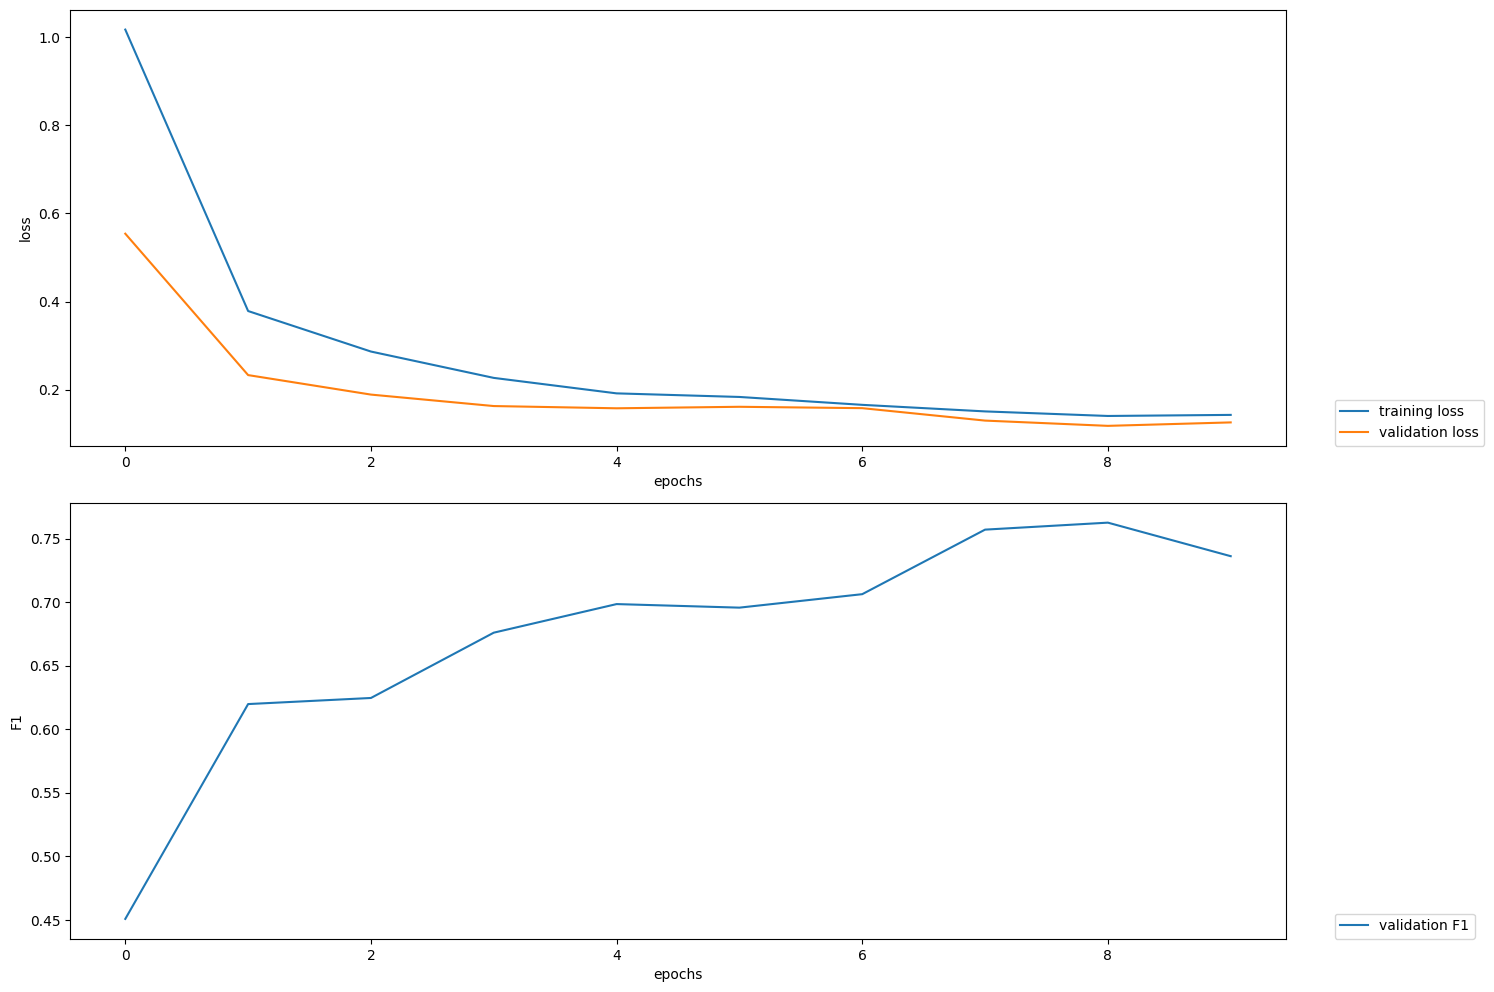

2024-01-23 12:06:01,473 Weights plots are saved in /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/Flair-FR/Flair-ECHR-train-FR/Flair-Hug-model-FR-all-rev-shuffled/weights.png


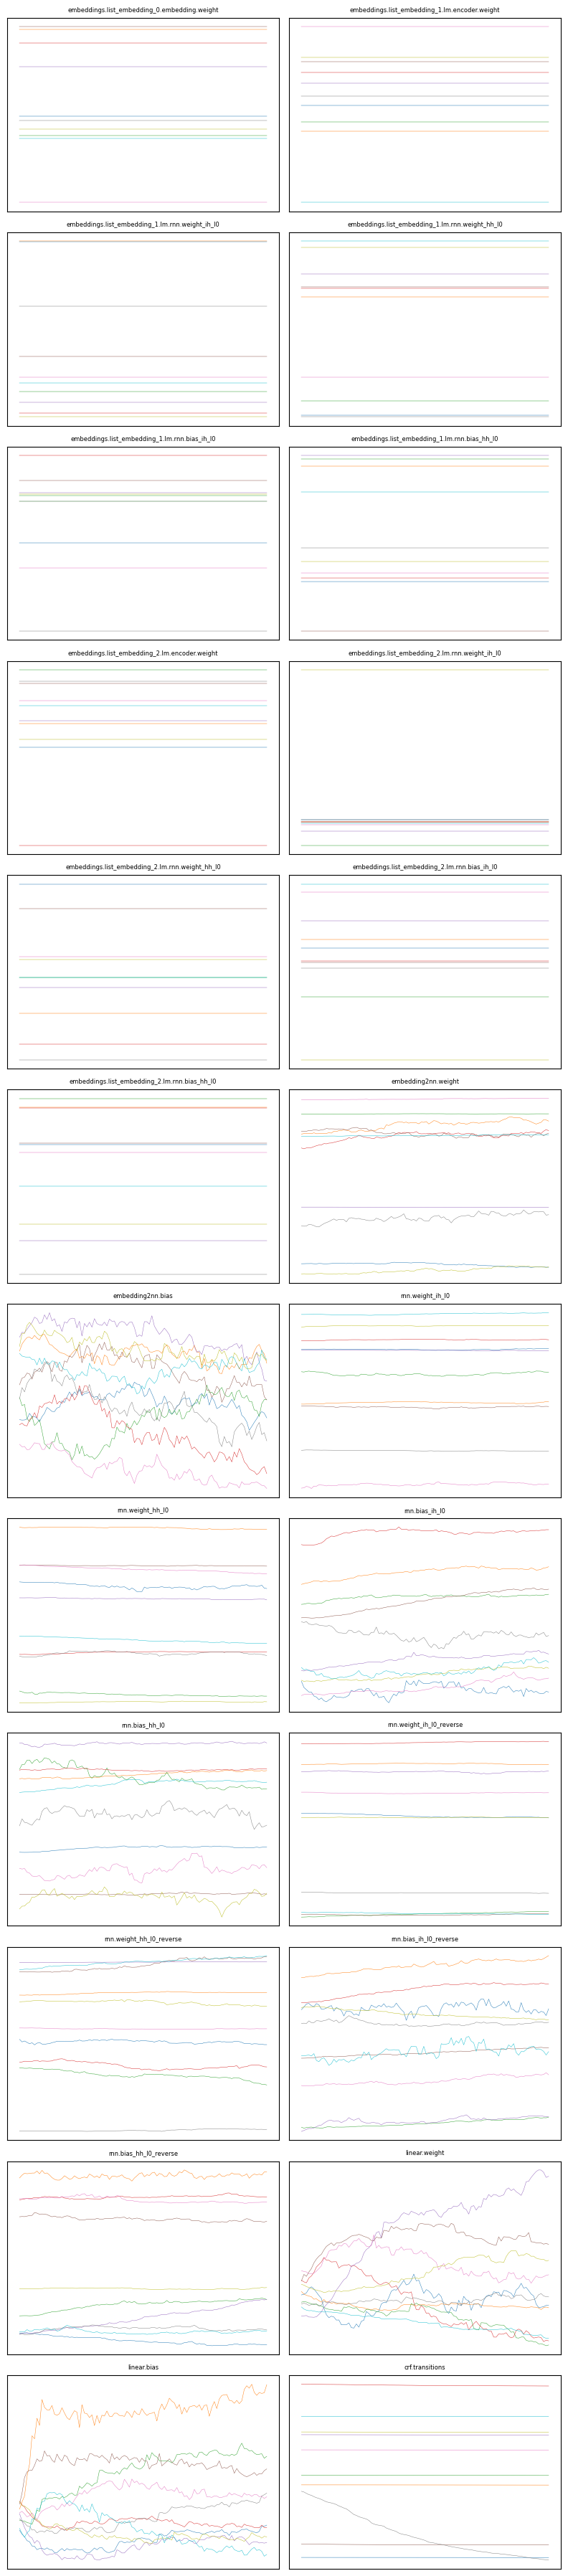

In [12]:
# plot training loss and weights
# Check documentation on training models with Flair

from flair.visual.training_curves import Plotter

plotter = Plotter()
plotter.plot_training_curves('/content/drive/MyDrive/.../loss.tsv')
plotter.plot_weights('/content/drive/MyDrive/.../weights.txt')